# Predicting Osteoporosis Risk | By Mavani Krishnkumar

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

import joblib

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

### Loads the dataset from a CSV file named "osteoporosis.csv" into a pandas DataFrame named df

In [3]:
old_df = pd.read_csv("osteoporosis.csv")

### dataset copy from old_df to df

In [4]:
df = old_df.copy()

## Data Exploration

### Dataset in Count rows and columns

In [5]:
df.shape

(1958, 16)

### Displays the first 5 rows of the DataFrame to get an overview of the dataset.

In [6]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


### Provides a summary of the dataset, including column names, data types, and the number of non-null values in each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

## Data Preprocessing

### Identify missing values column & resolve missing values column

#### Checks for missing values in each column and returns their count.

In [8]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

#### Checks for missing values in each column using heatmap.

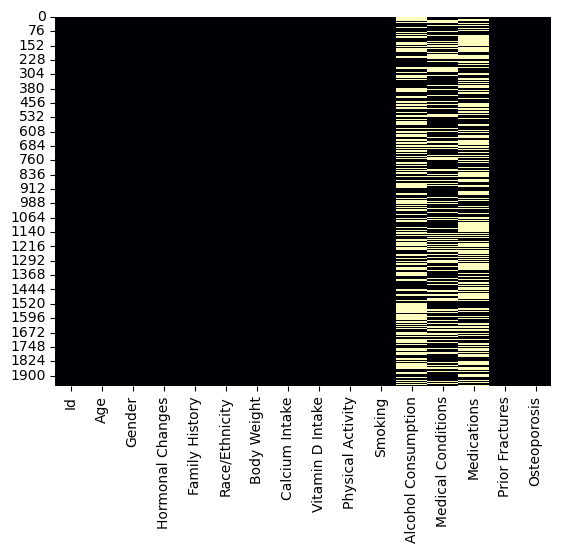

In [9]:
sns.heatmap(df.isnull(), cmap="magma", cbar=False)
plt.show()

#### In categorical null columns filled with "None".

In [10]:
df.fillna('None',inplace=True)

#### Re-Checks for missing values in each column and returns their count.

In [11]:
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

#### Re-Checks for missing values in each column using heatmap.

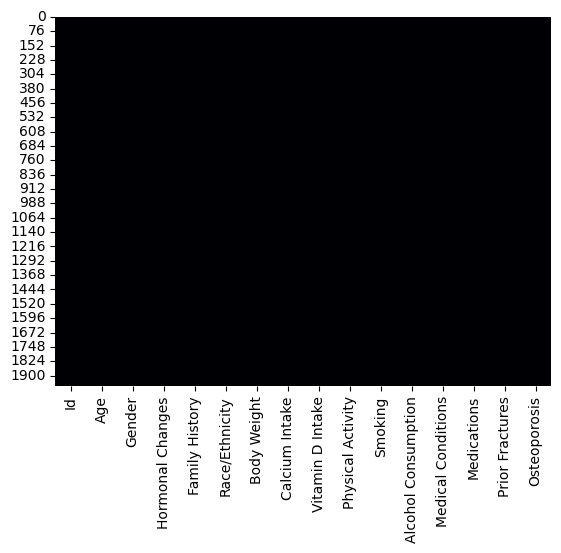

In [12]:
sns.heatmap(df.isnull(), cmap="magma", cbar=False)
plt.show()

### Identifies duplicate rows in the dataset and returns their count.

In [13]:
df.duplicated().sum()

0

### Identifying Outliers

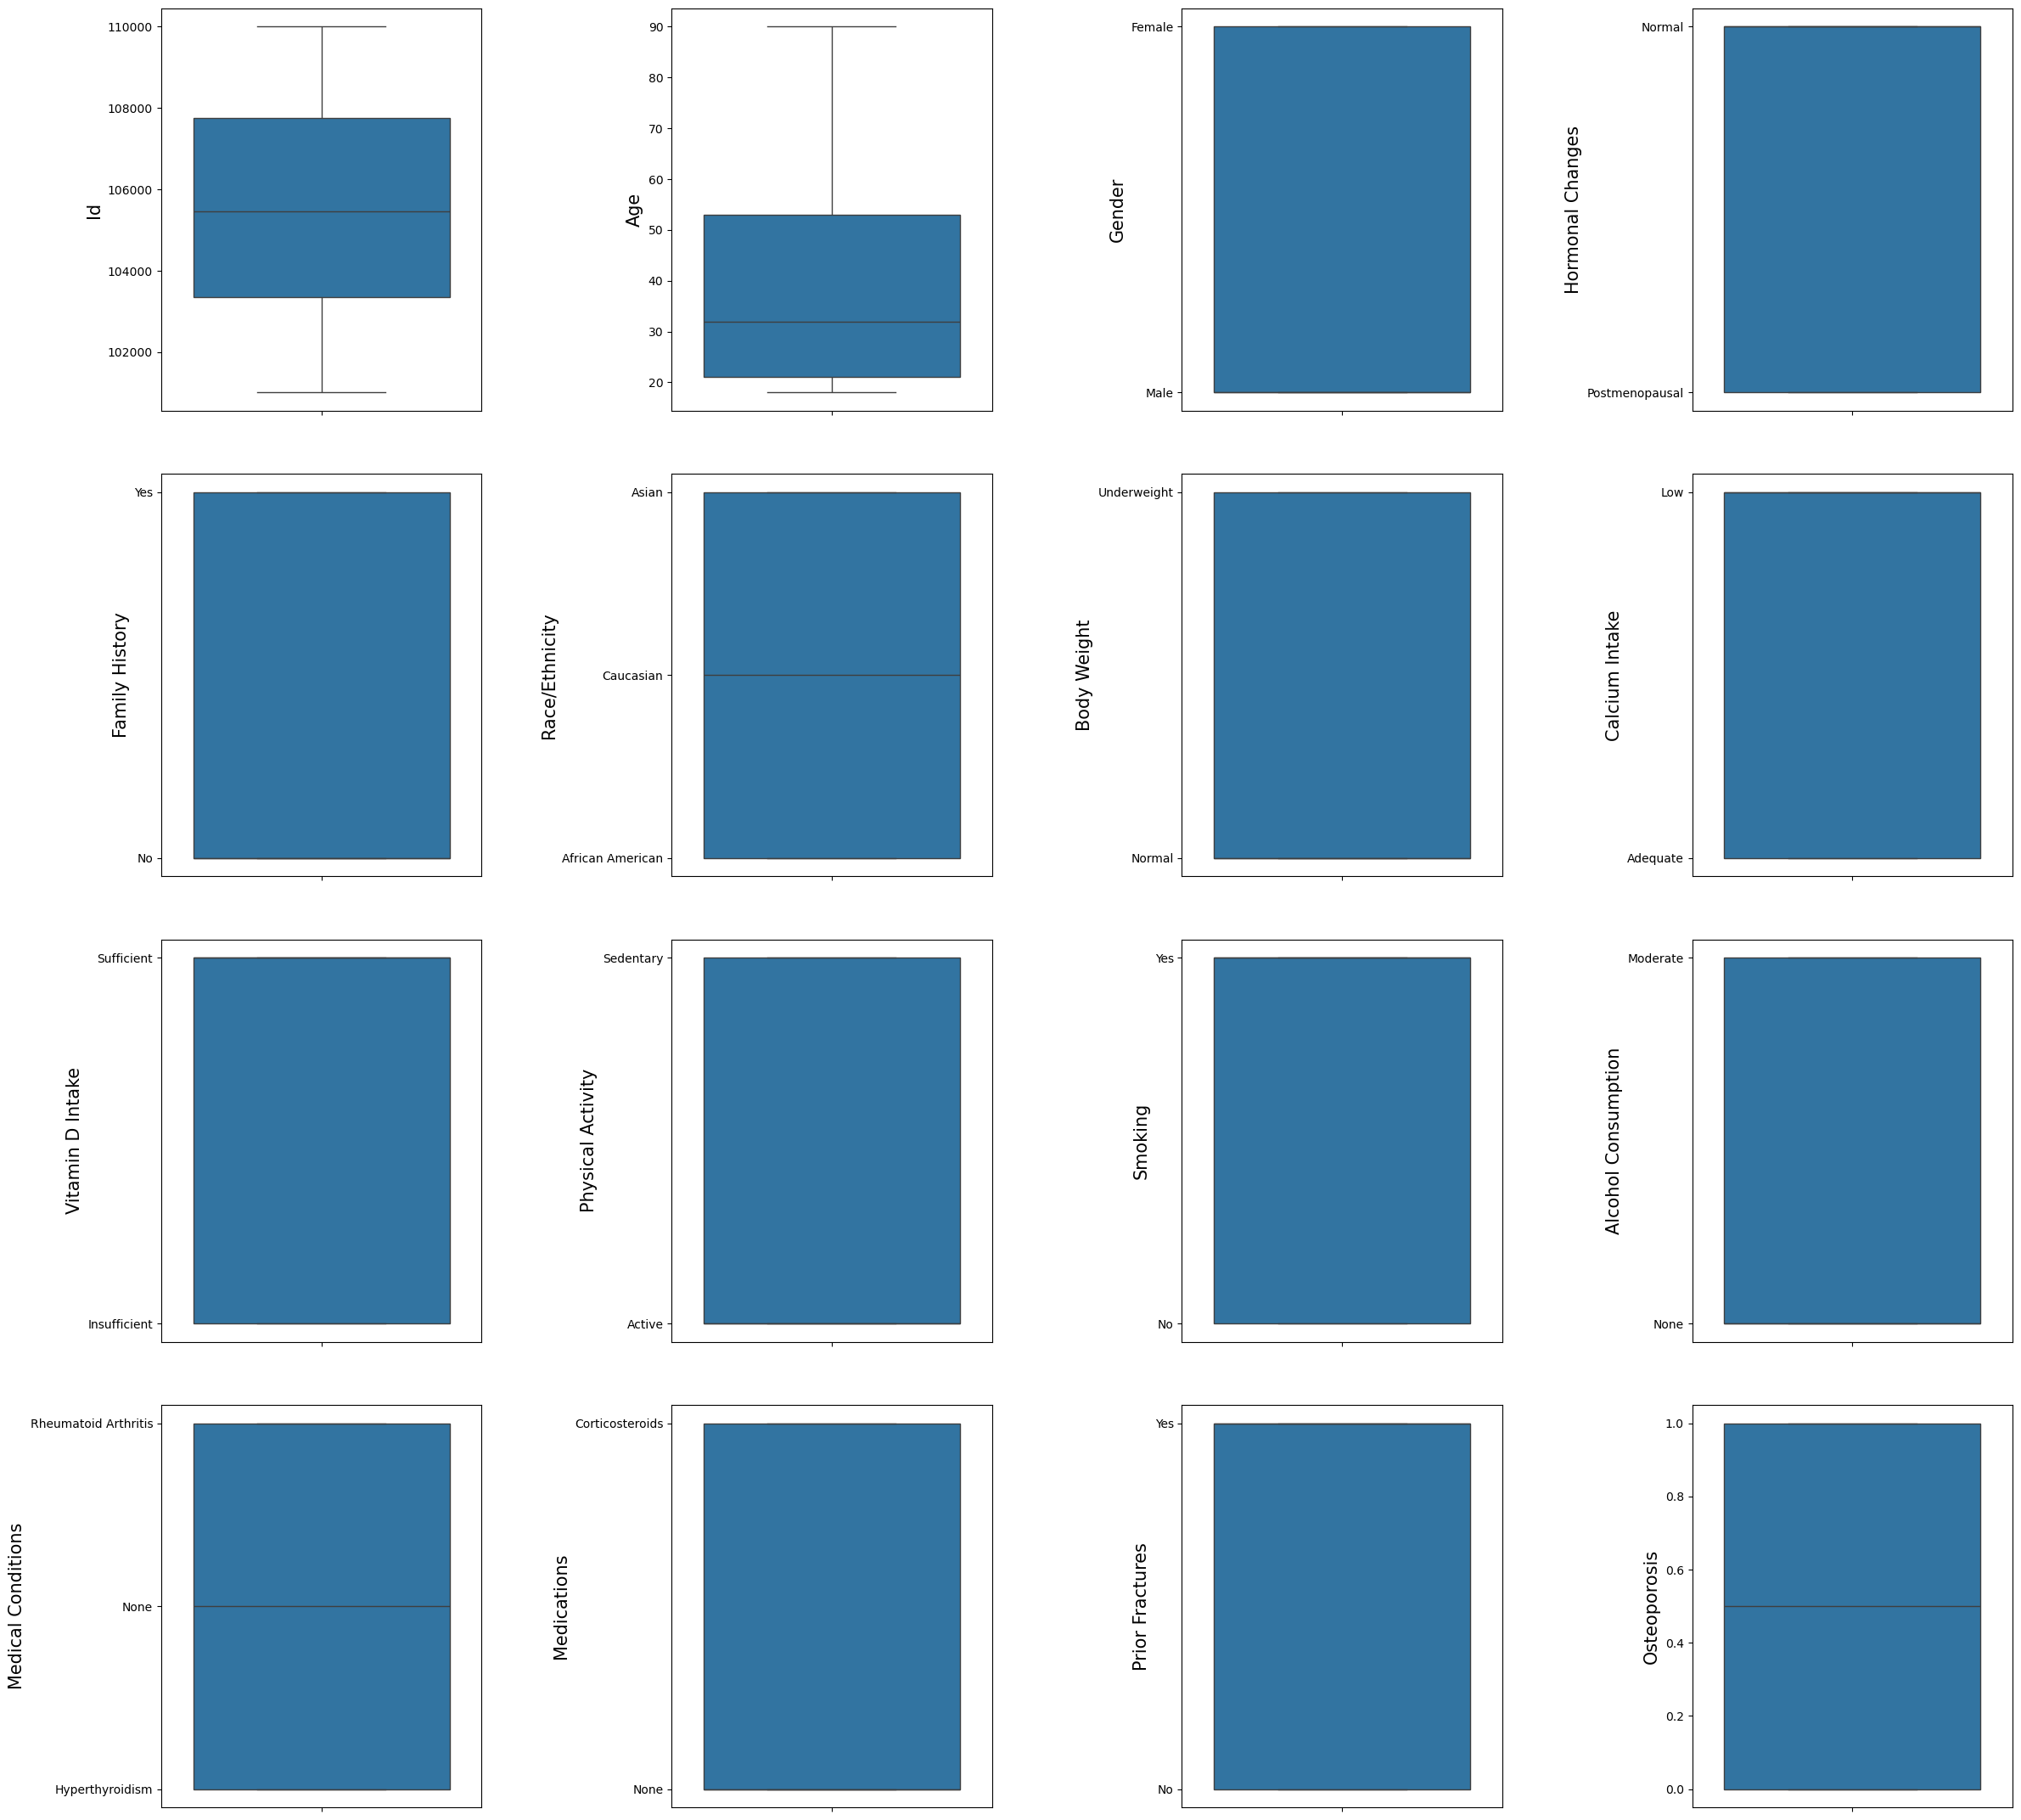

In [14]:
fig = plt.figure(figsize=(25, 50))
for i in range(len(df.columns)):
    ax = fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=df.iloc[:, i], ax=ax)
    ax.set_ylabel(df.columns[i], fontsize=15)
    
plt.tight_layout(pad=5.0)

### Identify unique columns

#### In Dataset how many columns data unique numerical way

In [15]:
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

Id: 1749
Age: 73
Gender: 2
Hormonal Changes: 2
Family History: 2
Race/Ethnicity: 3
Body Weight: 2
Calcium Intake: 2
Vitamin D Intake: 2
Physical Activity: 2
Smoking: 2
Alcohol Consumption: 2
Medical Conditions: 3
Medications: 2
Prior Fractures: 2
Osteoporosis: 2


#### In Dataset how many columns data unique categorical way

In [16]:
for col in df.columns:
    print(f"\033[1m{col}\033[0m: {df[col].unique()}")

Id: [104866 101999 106567 ... 106130 105187 108561]
Age: [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 90 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18
 28 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63
 27]
Gender: ['Female' 'Male']
Hormonal Changes: ['Normal' 'Postmenopausal']
Family History: ['Yes' 'No']
Race/Ethnicity: ['Asian' 'Caucasian' 'African American']
Body Weight: ['Underweight' 'Normal']
Calcium Intake: ['Low' 'Adequate']
Vitamin D Intake: ['Sufficient' 'Insufficient']
Physical Activity: ['Sedentary' 'Active']
Smoking: ['Yes' 'No']
Alcohol Consumption: ['Moderate' 'None']
Medical Conditions: ['Rheumatoid Arthritis' 'None' 'Hyperthyroidism']
Medications: ['Corticosteroids' 'None']
Prior Fractures: ['Yes' 'No']
Osteoporosis: [1 0]


### Identify categorical features & numeric features columns

#### In dataset find categorical features & numeric features columns

In [17]:
col = list(df.columns)

categorical_features = []
numerical_features = []

for i in col:
    if df[i].dtype == 'object' or i == 'Conversion':  
        categorical_features.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerical_features.append(i)

#### length of the categorical features in the dataset

In [18]:
len(categorical_features)

13

#### print categorical features in the dataset

In [19]:
categorical_features

['Gender',
 'Hormonal Changes',
 'Family History',
 'Race/Ethnicity',
 'Body Weight',
 'Calcium Intake',
 'Vitamin D Intake',
 'Physical Activity',
 'Smoking',
 'Alcohol Consumption',
 'Medical Conditions',
 'Medications',
 'Prior Fractures']

#### find & print categorical features in unique values count

In [20]:
for col_cat in categorical_features:
    print(f"{col_cat} : {df[col_cat].unique()}")
    print(df[col_cat].value_counts())
    print("_" * 70)

Gender : ['Female' 'Male']
Gender
Male      992
Female    966
Name: count, dtype: int64
______________________________________________________________________
Hormonal Changes : ['Normal' 'Postmenopausal']
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
______________________________________________________________________
Family History : ['Yes' 'No']
Family History
No     998
Yes    960
Name: count, dtype: int64
______________________________________________________________________
Race/Ethnicity : ['Asian' 'Caucasian' 'African American']
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
______________________________________________________________________
Body Weight : ['Underweight' 'Normal']
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
______________________________________________________________________
Calcium Intake : ['Low' 'Adequate']
Calciu

#### length of the numerical features in the dataset

In [21]:
len(numerical_features)

3

#### print numerical features in the dataset

In [22]:
numerical_features

['Id', 'Age', 'Osteoporosis']

#### find & print numerical features in unique values count

In [23]:
for col_num in numerical_features:
    print(f"{col_num} : {df[col_num].unique()}")
    print(df[col_num].value_counts())
    print("_" * 70)

Id : [104866 101999 106567 ... 106130 105187 108561]
Id
106463    3
107264    3
103172    3
107509    3
101608    3
         ..
104785    1
105710    1
108330    1
102281    1
108561    1
Name: count, Length: 1749, dtype: int64
______________________________________________________________________
Age : [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 90 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18
 28 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63
 27]
Age
18    152
19    147
34    121
29    118
21    117
     ... 
88      9
60      8
28      8
58      7
48      6
Name: count, Length: 73, dtype: int64
______________________________________________________________________
Osteoporosis : [1 0]
Osteoporosis
1    979
0    979
Name: count, dtype: int64
______________________________________________________________________


### Generates descriptive statistics for numerical columns, such as count, mean, standard deviation, and min/max values.

In [24]:
d_stats = df[numerical_features].describe()

d_stats.loc['Median'] = df[numerical_features].median()
d_stats.loc['Variance'] = df[numerical_features].var()
d_stats.loc['Skewness'] = df[numerical_features].skew()
d_stats.loc['Kurtosis'] = df[numerical_features].kurtosis()

desc_stats = d_stats

desc_stats = desc_stats.style.background_gradient(axis=1, cmap="Blues", vmin=0, vmax=90000)

desc_stats

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000
Median,105469.000000,32.000000,0.500000
Variance,6705032.785170,456.054153,0.250128


## Exploratory Data Analysis (EDA) & Visualization

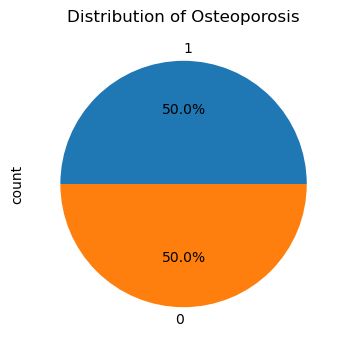

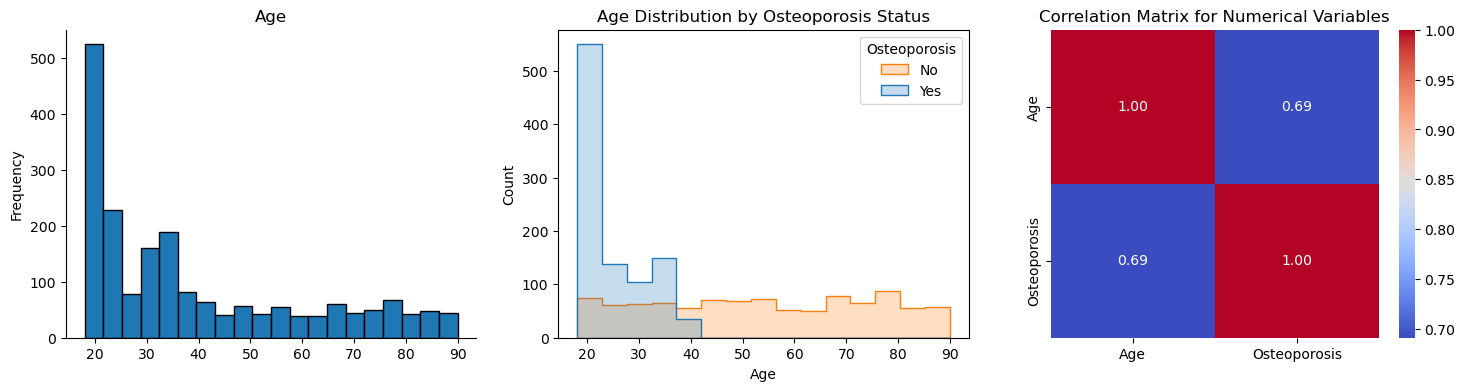

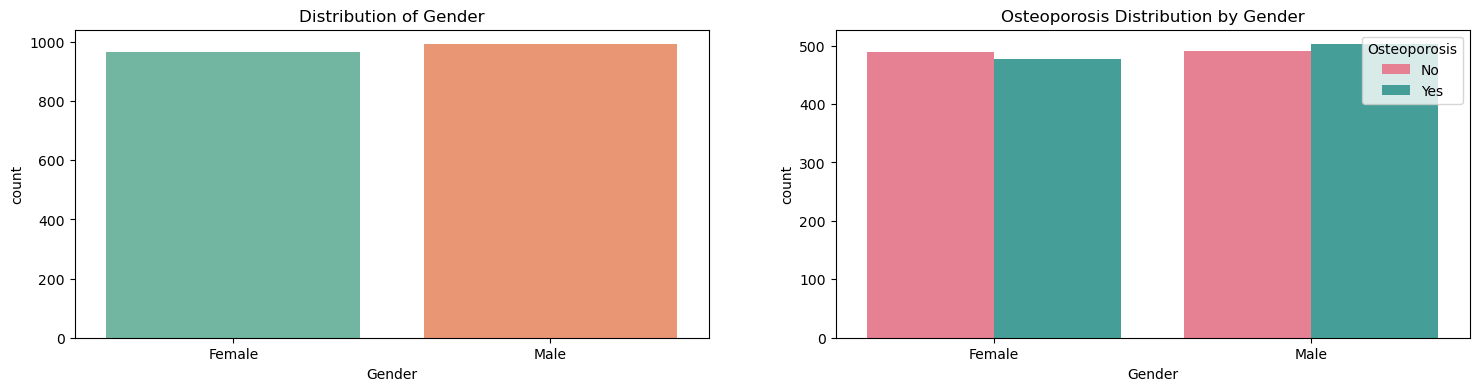

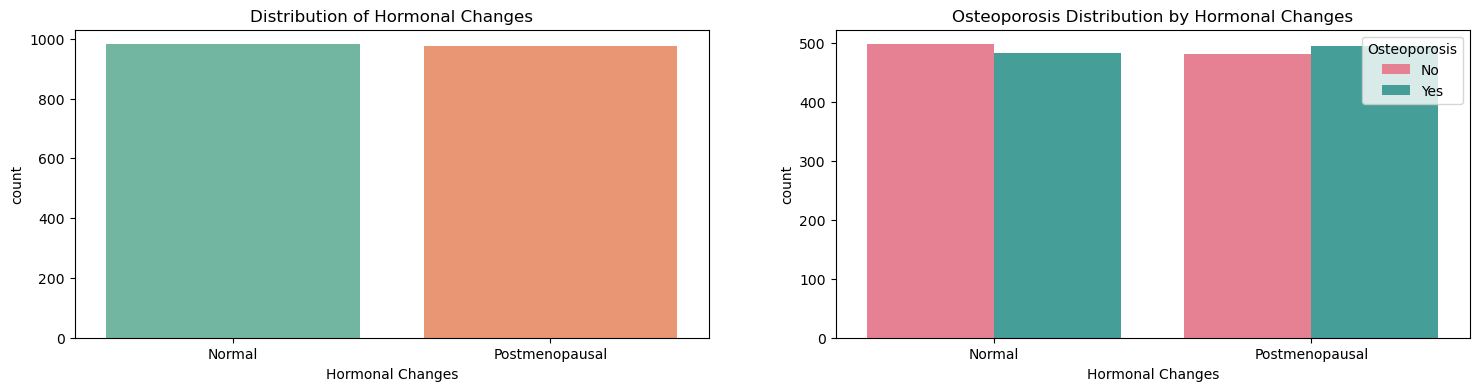

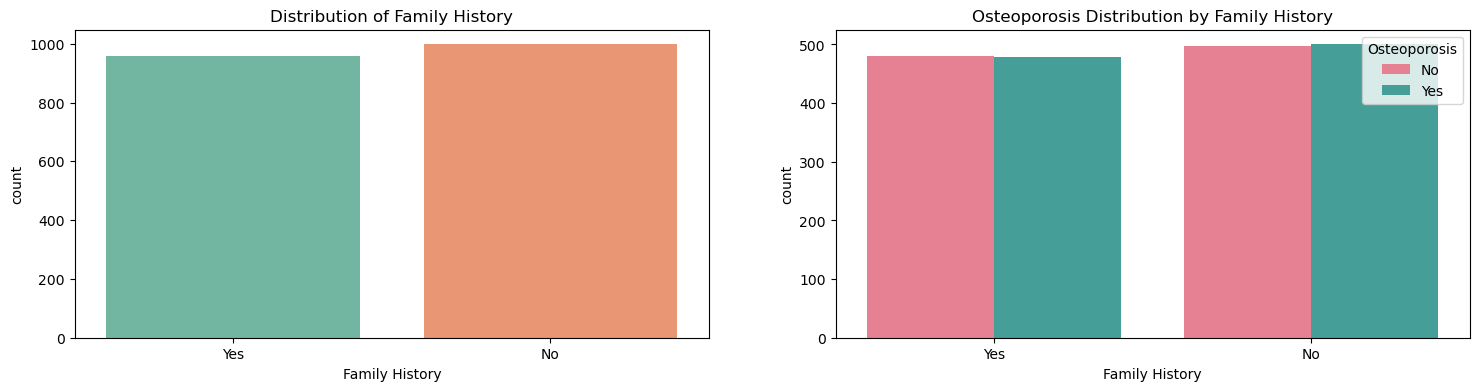

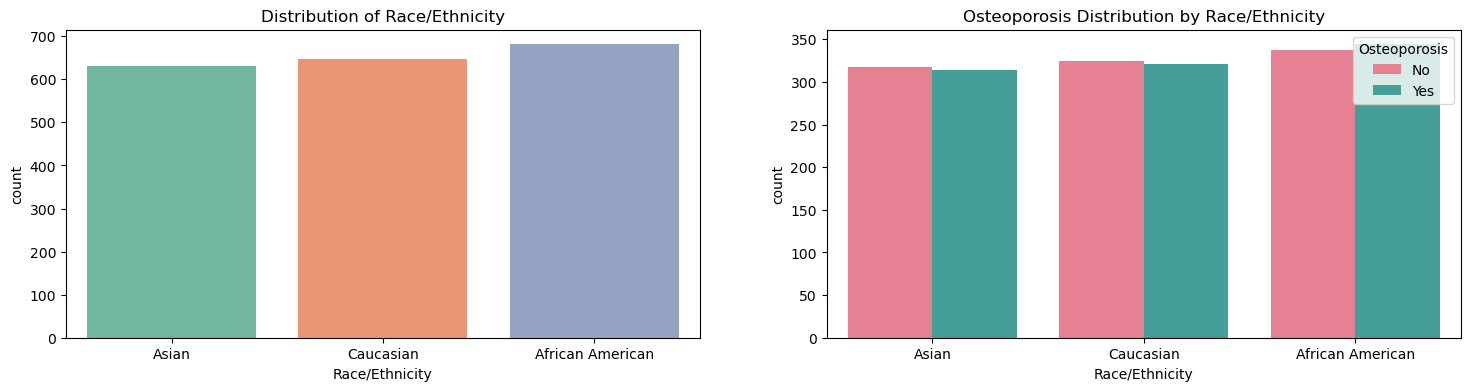

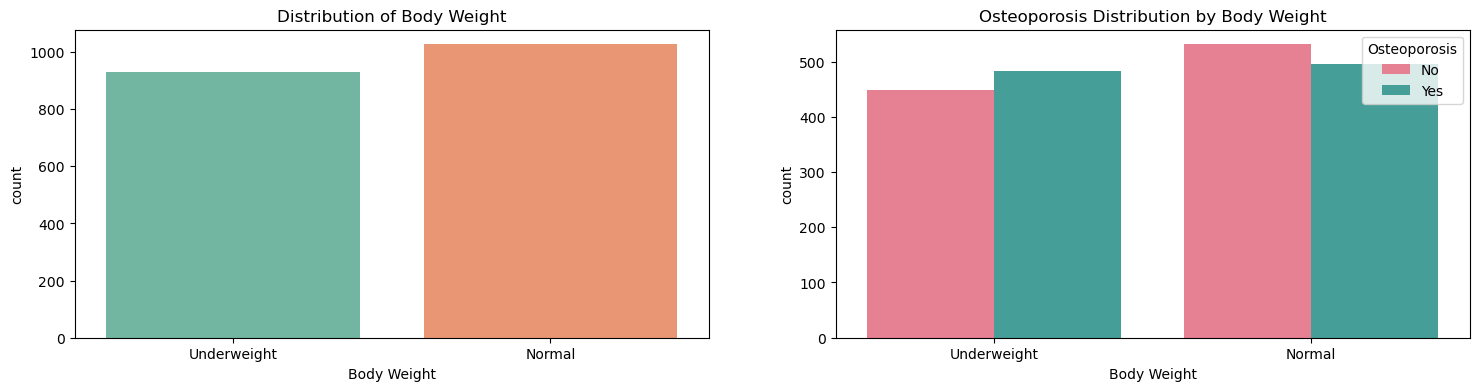

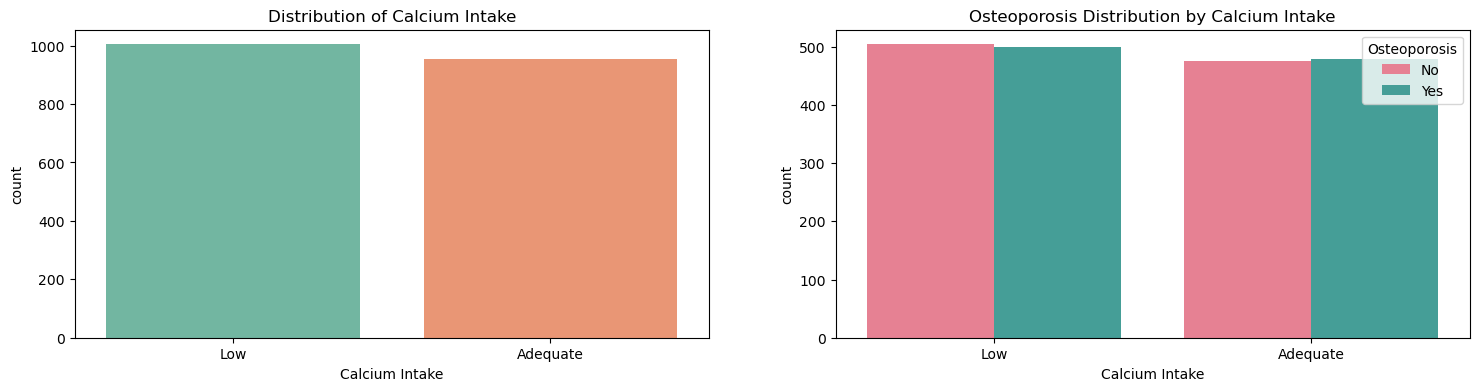

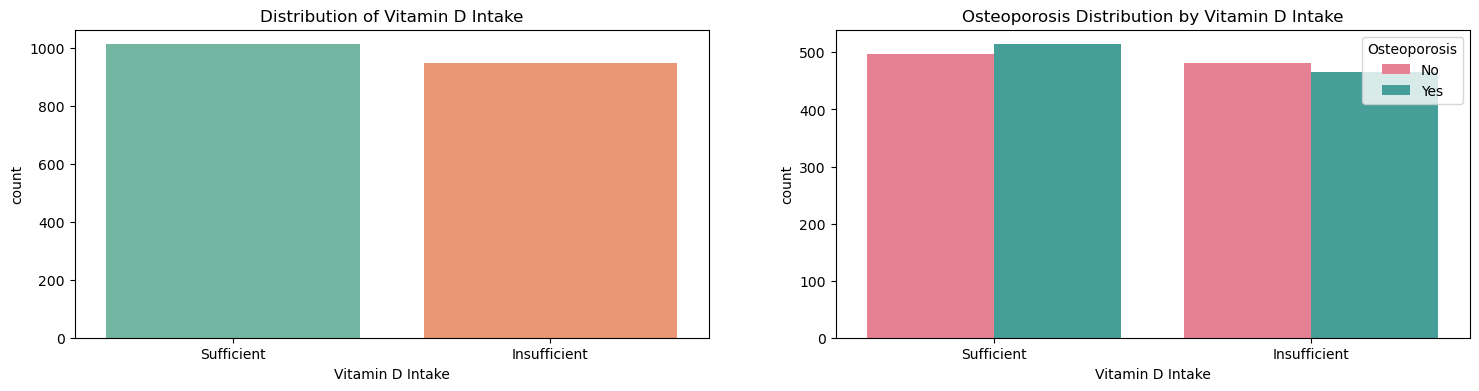

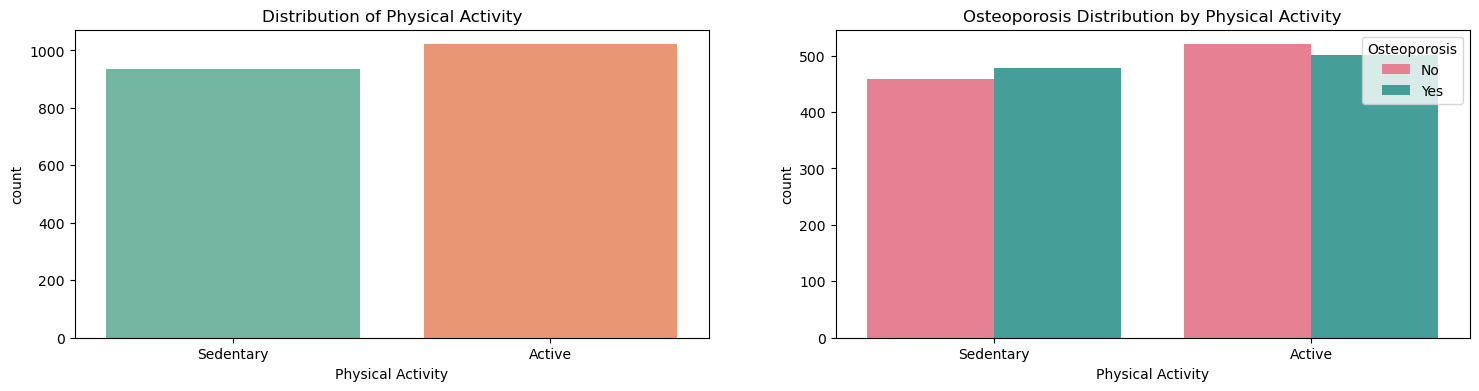

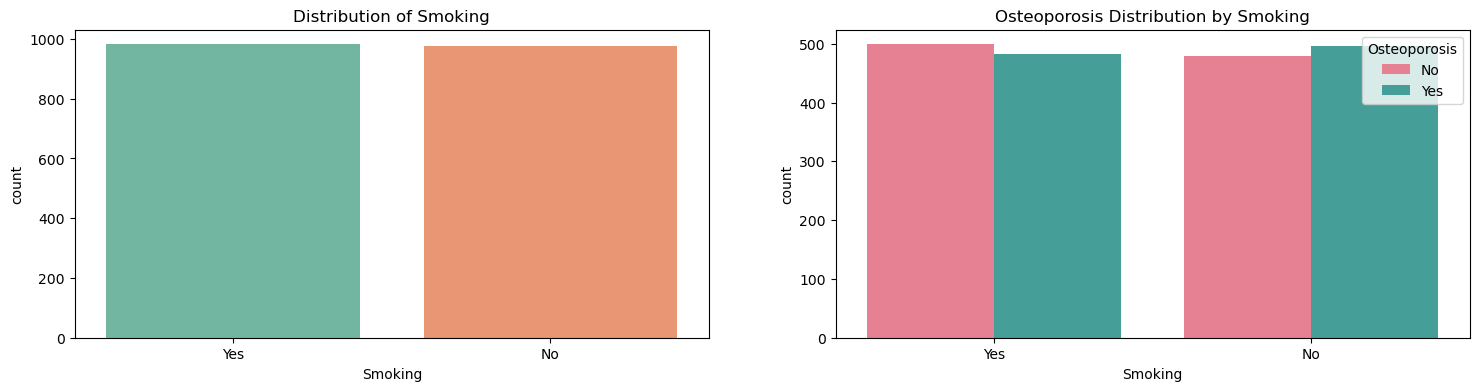

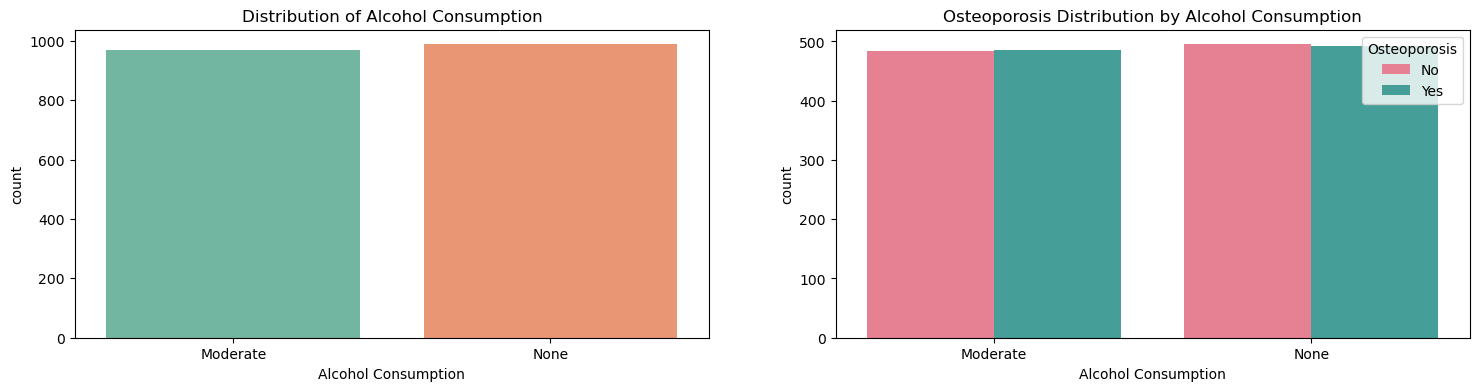

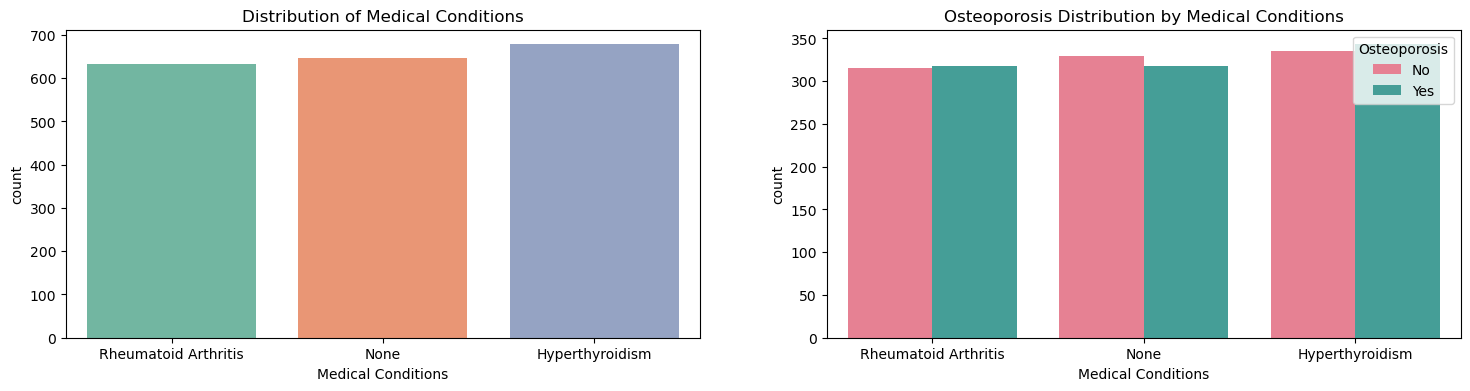

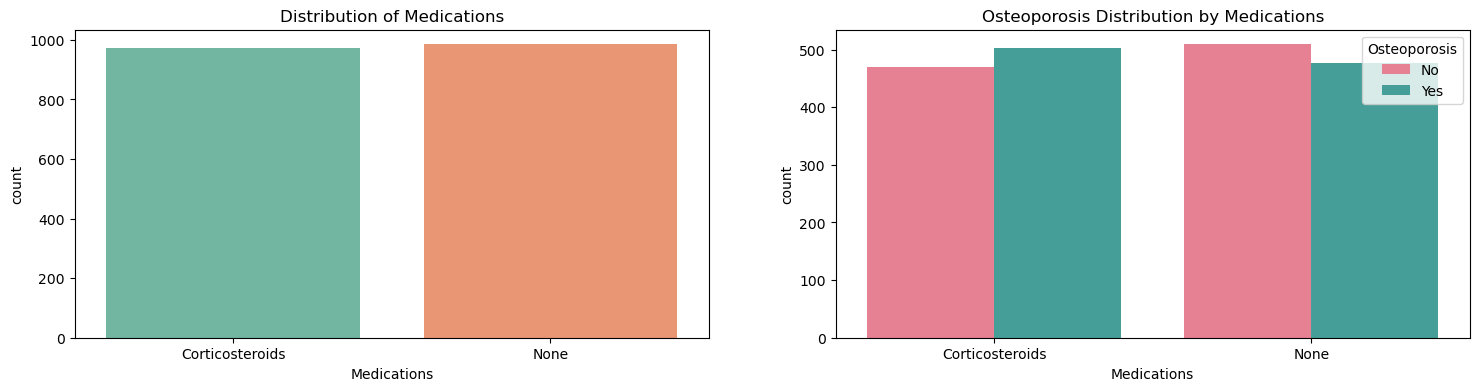

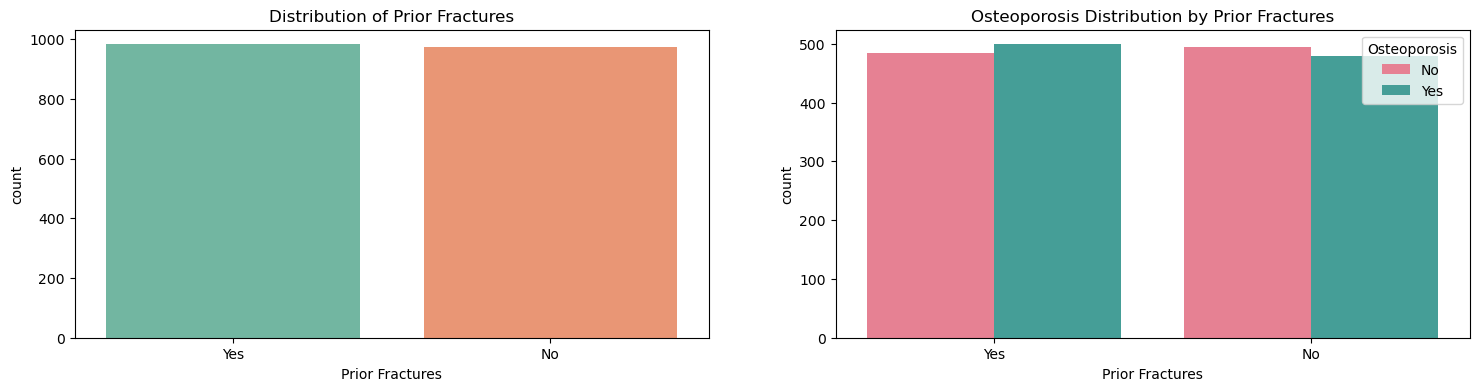

In [25]:
plt.figure(figsize=(18, 4))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Distribution of Osteoporosis')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

df['Age'].plot(kind='hist', bins=20, title='Age', ax=axes[0], edgecolor='black')
axes[0].spines[['top', 'right']].set_visible(False)

sns.histplot(data=df, x='Age', hue='Osteoporosis', element='step', ax=axes[1]).set_title('Age Distribution by Osteoporosis Status')
axes[1].legend(title="Osteoporosis", labels=["No", "Yes"])

correlation_matrix = df[['Age', 'Osteoporosis']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2]).set_title("Correlation Matrix for Numerical Variables")

features = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight',
    'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption',
    'Medical Conditions', 'Medications', 'Prior Fractures'
]

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))
    
    sns.countplot(data=df, x=feature, palette='Set2', ax=axes[0]).set_title(f"Distribution of {feature}")
    
    sns.countplot(data=df, x=feature, hue='Osteoporosis', palette='husl', ax=axes[1]).set_title(f"Osteoporosis Distribution by {feature}")
    axes[1].legend(title="Osteoporosis", labels=["No", "Yes"])

## Feature Engineering

### In Apply Label Encoding Techniques in the categorical features

In [26]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,101999,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,106567,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,102316,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,101944,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


### Define the input features (X)

In [27]:
X = df.drop(columns=['Id', 'Osteoporosis'])
# X.head()
X.shape

(1958, 14)

### Define the target (y)

In [28]:
y = df['Osteoporosis']
# y.head()
y.shape

(1958,)

### Split the data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X_train.head()
X_train.shape

(1566, 14)

In [31]:
# y_train.head()
y_train.shape

(1566,)

### Standardize the features (scaling)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## In each Model without  hyperparameter tuning and using GridSearchCV (Regular Models)

### Train multiple classifiers (Random Forest, Decision Tree, Logistic Regression, SVC) on the training data

#### Random Forest Classifier

In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Decision Tree Classifier

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Logistic Regression

In [35]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Supprt Vector Classifier

In [36]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

### Make predictions using the trained models on the test data

In [37]:
rf_y_pred = rf.predict(X_test)
dt_y_pred = dt.predict(X_test)
lr_y_pred = lr.predict(X_test)
svc_y_pred = svc.predict(X_test)

### Performance Evoluation

#### All Models in Calculate Accuracy

##### Table Format

In [38]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)

accuracy_data = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"],
    "Accuracy": [rf_accuracy, dt_accuracy, lr_accuracy, svc_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

,Model,Accuracy
0,Random Forest,0.846939
1,Decision Tree,0.829082
2,Logistic Regression,0.803571
3,SVM,0.808673


##### Bar Plot Format

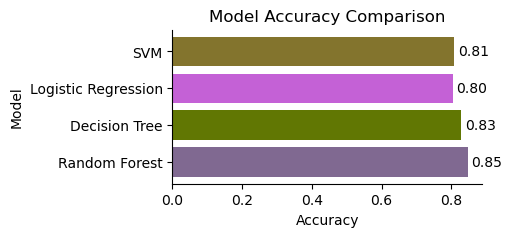

In [39]:
random_colors = np.random.rand(len(accuracy_df), 3)

plt.figure(figsize=(4,2))
bars = plt.barh(accuracy_df["Model"], accuracy_df["Accuracy"], color=random_colors)

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")

plt.show()

#### All Models in Calculate Confusion Matrix

##### Table Format

In [40]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
dt_cm = confusion_matrix(y_test, dt_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)
svc_cm = confusion_matrix(y_test, svc_y_pred)

confusion_data = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"],
    "Confusion Matrix": [rf_cm, dt_cm, lr_cm, svc_cm]
}

confusion_df = pd.DataFrame(confusion_data)
confusion_df

,Model,Confusion Matrix
0,Random Forest,"[[183, 10], [50, 149]]"
1,Decision Tree,"[[151, 42], [25, 174]]"
2,Logistic Regression,"[[165, 28], [49, 150]]"
3,SVM,"[[174, 19], [56, 143]]"


##### Bar Plot Format

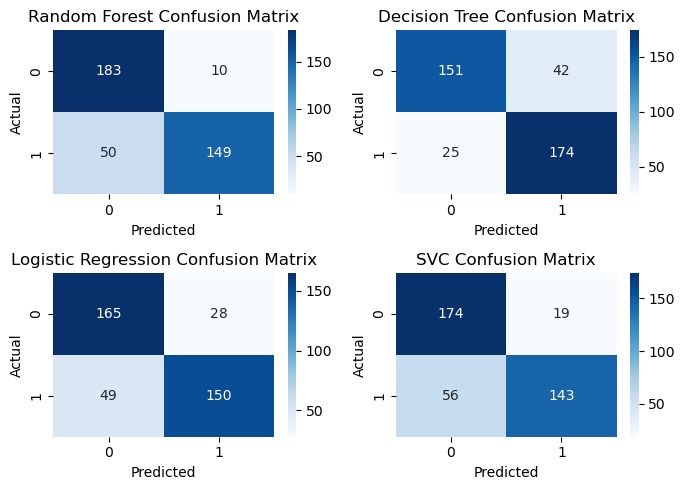

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")
axes[0, 0].set_title("Random Forest Confusion Matrix")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")
axes[0, 1].set_title("Decision Tree Confusion Matrix")

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")
axes[1, 0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")
axes[1, 1].set_title("SVC Confusion Matrix")

plt.tight_layout()

#### All Models in calculate Classification Report

In [42]:
rf_report = classification_report(y_test, rf_y_pred)
print("Random Forest Classification Report: ")
print(rf_report)

dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classification Report: ")
print(dt_report)

lr_report = classification_report(y_test, lr_y_pred)
print("Logistic Regression Classification Report: ")
print(lr_report)

svc_report = classification_report(y_test, svc_y_pred)
print("Support Vector Classifier Classification Report: ")
print(svc_report)

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       193
           1       0.94      0.75      0.83       199

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.86      0.85      0.85       392

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       193
           1       0.81      0.87      0.84       199

    accuracy                           0.83       392
   macro avg       0.83      0.83      0.83       392
weighted avg       0.83      0.83      0.83       392

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       193
           1       0.84      0.75      0.80       199

    accuracy                           0.80       392
   macro

#### All Models in Feature Importance

In [43]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# important_features_rf = pd.DataFrame({'Features': X_train.columns, 'Importance': rf.feature_importances_})
# important_features_rf = important_features_rf.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_rf, ax=axes[0, 0]).set_title('Random Forest Feature Importance')

# important_features_dt = pd.DataFrame({'Features': X_train.columns, 'Importance': dt.feature_importances_})
# important_features_dt = important_features_dt.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_dt, ax=axes[0, 1]).set_title('Decision Tree Feature Importance')

# important_features_lr = pd.DataFrame({'Features': X_train.columns, 'Importance': abs(lr.coef_[0])})
# important_features_lr = important_features_lr.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_lr, ax=axes[1, 0]).set_title('Logistic Regression Feature Importance')

# result = permutation_importance(svc, X_train, y_train, n_repeats=10, random_state=42)
# important_features_svc = pd.DataFrame({'Features': X_train.columns, 'Importance': result.importances_mean})
# important_features_svc = important_features_svc.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_svc, ax=axes[1, 1]).set_title('Support Vector Classifier Feature Importance')

# plt.tight_layout()

## In each Model hyperparameter tuning and using GridSearchCV (GridSearchCV Models)

### Hyperparameter grids for different classifiers to tune using GridSearchCV

In [44]:
gscv_rf_params = {
    'max_depth': [3, 5, 10], 
    'criterion': ['gini', 'entropy']
}

gscv_dt_params = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
}

gscv_lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'class_weight': ['balanced', None]
}

gscv_svc_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

### Fit the GridSearchCV object to the training data for hyperparameter tuning

#### Random Forest Classifier

In [45]:
gscv_rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), gscv_rf_params, cv=5, scoring='accuracy', n_jobs=-1)
gscv_rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10]},
             scoring='accuracy')

#### Decision Tree Classifier

In [46]:
gscv_dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), gscv_dt_params, cv=5, scoring='accuracy', n_jobs=-1)
gscv_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

#### Logistic Regression

In [47]:
gscv_lr_grid = GridSearchCV(LogisticRegression(random_state=42), gscv_lr_params, cv=5, scoring='accuracy', n_jobs=-1)
gscv_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None]},
             scoring='accuracy')

#### Support Vector Classifier

In [48]:
gscv_svc_grid = GridSearchCV(SVC(random_state=42), gscv_svc_params, cv=5, scoring='accuracy', n_jobs=-1)
gscv_svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### Get the best model from GridSearchCV and fit it to the training data

#### Random Forest Classifier

In [49]:
gscv_rf_best = gscv_rf_grid.best_estimator_
gscv_rf_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42)

#### Decision Tree Classifier

In [50]:
gscv_dt_best = gscv_dt_grid.best_estimator_
gscv_dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

#### Logistic Regression

In [51]:
gscv_lr_best = gscv_lr_grid.best_estimator_
gscv_lr_best.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', random_state=42)

#### Support Vector Classifier

In [52]:
gscv_svc_best = gscv_svc_grid.best_estimator_
gscv_svc_best.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', random_state=42)

### Make predictions using the best models from GridSearchCV on the test data

In [53]:
gscv_rf_y_pred = gscv_rf_best.predict(X_test)
gscv_dt_y_pred = gscv_dt_best.predict(X_test)
gscv_lr_y_pred = gscv_lr_best.predict(X_test)
gscv_svc_y_pred = gscv_svc_best.predict(X_test)

### Performance Evoluation

#### All Models in Calculate Accuracy

##### Table Format

In [54]:
gscv_rf_accuracy = accuracy_score(y_test, gscv_rf_y_pred)
gscv_dt_accuracy = accuracy_score(y_test, gscv_dt_y_pred)
gscv_lr_accuracy = accuracy_score(y_test, gscv_lr_y_pred)
gscv_svc_accuracy = accuracy_score(y_test, gscv_svc_y_pred)

gscv_accuracy_data = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"],
    "Accuracy": [gscv_rf_accuracy, gscv_dt_accuracy, gscv_lr_accuracy, gscv_svc_accuracy]
}

gscv_accuracy_df = pd.DataFrame(gscv_accuracy_data)
gscv_accuracy_df

,Model,Accuracy
0,Random Forest,0.852041
1,Decision Tree,0.903061
2,Logistic Regression,0.852041
3,SVM,0.849490


##### Bar Plot Format

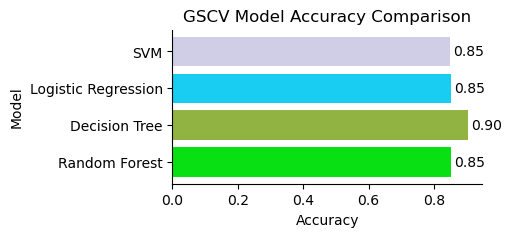

In [55]:
random_colors = np.random.rand(len(gscv_accuracy_df), 3)

plt.figure(figsize=(4,2))
bars = plt.barh(gscv_accuracy_df["Model"], gscv_accuracy_df["Accuracy"], color=random_colors)

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("GSCV Model Accuracy Comparison")

plt.show()

#### All Models in Calculate Confusion Matrix

##### Table Format

In [56]:
gscv_rf_cm = confusion_matrix(y_test, gscv_rf_y_pred)
gscv_dt_cm = confusion_matrix(y_test, gscv_dt_y_pred)
gscv_lr_cm = confusion_matrix(y_test, gscv_lr_y_pred)
gscv_svc_cm = confusion_matrix(y_test, gscv_svc_y_pred)

gscv_confusion_data = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"],
    "Confusion Matrix": [gscv_rf_cm, gscv_dt_cm, gscv_lr_cm, gscv_svc_cm]
}

gscv_confusion_df = pd.DataFrame(gscv_confusion_data)
gscv_confusion_df

,Model,Confusion Matrix
0,Random Forest,"[[193, 0], [58, 141]]"
1,Decision Tree,"[[191, 2], [36, 163]]"
2,Logistic Regression,"[[192, 1], [57, 142]]"
3,SVM,"[[192, 1], [58, 141]]"


##### Bar Plot Format

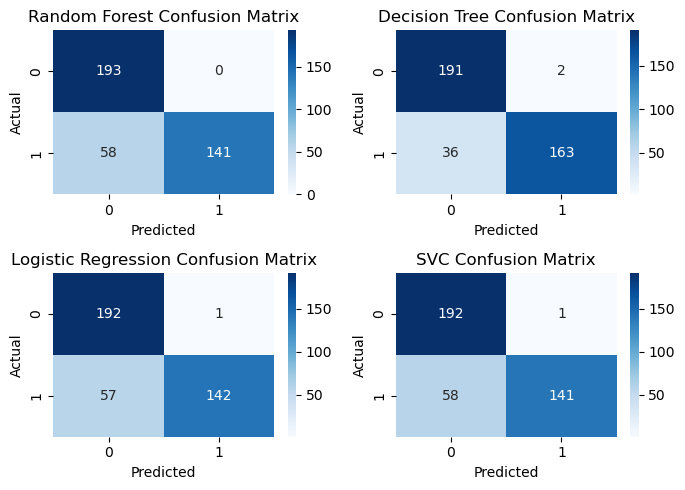

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

sns.heatmap(gscv_rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")
axes[0, 0].set_title("Random Forest Confusion Matrix")

sns.heatmap(gscv_dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")
axes[0, 1].set_title("Decision Tree Confusion Matrix")

sns.heatmap(gscv_lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")
axes[1, 0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(gscv_svc_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")
axes[1, 1].set_title("SVC Confusion Matrix")

plt.tight_layout()

#### All Models in calculate Classification Report

In [58]:
gscv_rf_report = classification_report(y_test, gscv_rf_y_pred)
print("Random Forest Classification Report: ")
print(gscv_rf_report)

gscv_dt_report = classification_report(y_test, gscv_dt_y_pred)
print("Decision Tree Classification Report: ")
print(gscv_dt_report)

gscv_lr_report = classification_report(y_test, gscv_lr_y_pred)
print("Logistic Regression Classification Report: ")
print(gscv_lr_report)

gscv_svc_report = classification_report(y_test, gscv_svc_y_pred)
print("Support Vector Classifier Classification Report: ")
print(gscv_svc_report)

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       193
           1       1.00      0.71      0.83       199

    accuracy                           0.85       392
   macro avg       0.88      0.85      0.85       392
weighted avg       0.89      0.85      0.85       392

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       193
           1       0.99      0.82      0.90       199

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.90       392
weighted avg       0.92      0.90      0.90       392

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       193
           1       0.99      0.71      0.83       199

    accuracy                           0.85       392
   macro

#### All Models in Feature Importance

In [59]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# important_features_gscv_rf = pd.DataFrame({'Features': X_train.columns, 'Importance': gscv_rf_best.feature_importances_})
# important_features_gscv_rf = important_features_gscv_rf.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_gscv_rf, ax=axes[0, 0]).set_title('Random Forest Feature Importance')

# important_features_gscv_dt = pd.DataFrame({'Features': X_train.columns, 'Importance': gscv_dt_best.feature_importances_})
# important_features_gscv_dt = important_features_gscv_dt.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_gscv_dt, ax=axes[0, 1]).set_title('Decision Tree Feature Importance')

# important_features_gscv_lr = pd.DataFrame({'Features': X_train.columns, 'Importance': abs(gscv_lr_best.coef_[0])})
# important_features_gscv_lr = important_features_gscv_lr.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_gscv_lr, ax=axes[1, 0]).set_title('Logistic Regression Feature Importance')

# result = permutation_importance(gscv_svc_best, X_train, y_train, n_repeats=10, random_state=42)
# important_features_gscv_svc = pd.DataFrame({'Features': X_train.columns, 'Importance': result.importances_mean})
# important_features_gscv_svc = important_features_gscv_svc.sort_values('Importance', ascending=False)
# sns.barplot(x='Importance', y='Features', data=important_features_gscv_svc, ax=axes[1, 1]).set_title('Support Vector Classifier Feature Importance')

# plt.tight_layout()

## Compare Regular and GridSearchCV models accuracies

### Table Format

In [60]:
compare_accuracy_data = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "SVM"],
    "Accuracy (Regular)": [rf_accuracy, dt_accuracy, lr_accuracy, svc_accuracy],
    "Accuracy (GridSearchCV)": [gscv_rf_accuracy, gscv_dt_accuracy, gscv_lr_accuracy, gscv_svc_accuracy]
}

compare_accuracy_df = pd.DataFrame(compare_accuracy_data)
compare_accuracy_df

,Model,Accuracy (Regular),Accuracy (GridSearchCV)
0,Random Forest,0.846939,0.852041
1,Decision Tree,0.829082,0.903061
2,Logistic Regression,0.803571,0.852041
3,SVM,0.808673,0.849490


### Bar Plot Format

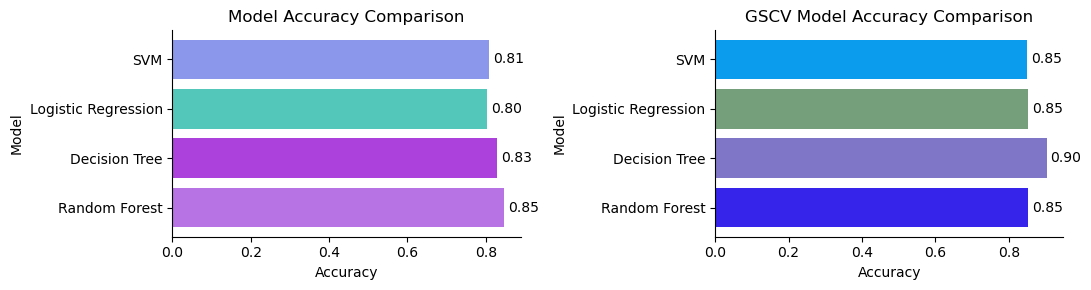

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

random_colors = np.random.rand(len(accuracy_df), 3)
bars = axes[0].barh(accuracy_df["Model"], accuracy_df["Accuracy"], color=random_colors)

for bar in bars:
    axes[0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():.2f}', va='center')

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].set_xlabel("Accuracy")
axes[0].set_ylabel("Model")
axes[0].set_title("Model Accuracy Comparison")

random_colors = np.random.rand(len(gscv_accuracy_df), 3)
bars = axes[1].barh(gscv_accuracy_df["Model"], gscv_accuracy_df["Accuracy"], color=random_colors)

for bar in bars:
    axes[1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                 f'{bar.get_width():.2f}', va='center')

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].set_xlabel("Accuracy")
axes[1].set_ylabel("Model")
axes[1].set_title("GSCV Model Accuracy Comparison")

plt.tight_layout()

## Create Prediction Function for All Models

In [62]:
def predict_osteoporosis_risk(patient_data, model):
    processed_data = []

    for col in X.columns:
        if col in label_encoders:
            try:
                processed_value = label_encoders[col].transform([patient_data[col]])[0]
            except ValueError:
                raise ValueError(f"Invalid value '{patient_data[col]}' for column '{col}'. Expected one of: {list(label_encoders[col].classes_)}")
        else:
            processed_value = patient_data[col]
        processed_data.append(processed_value)

    processed_data = np.array(processed_data).reshape(1, -1)  
    processed_data = scaler.transform(processed_data)  

    prediction = model.predict(processed_data)[0]

    return "High Risk" if prediction == 1 else "Low Risk"

sample_patient = {
    'Age': '38',
    'Gender': 'Female',
    'Hormonal Changes': 'Postmenopausal',
    'Family History': 'Yes',
    'Race/Ethnicity': 'Caucasian',
    'Body Weight': 'Underweight',
    'Calcium Intake': 'Low',
    'Vitamin D Intake': 'Insufficient',
    'Physical Activity': 'Sedentary',
    'Smoking': 'Yes',
    'Alcohol Consumption': 'Moderate',
    'Medical Conditions': 'Rheumatoid Arthritis',
    'Medications': 'Corticosteroids',
    'Prior Fractures': 'No'
}

predictions_df = pd.DataFrame({
    "Model Name": ["Random Forest", "Decision Tree", "Logistic Regression", "SVC"],
    "Without GridSearchCV Prediction": [
        predict_osteoporosis_risk(sample_patient, rf),
        predict_osteoporosis_risk(sample_patient, dt),
        predict_osteoporosis_risk(sample_patient, lr),
        predict_osteoporosis_risk(sample_patient, svc)
    ],
    "With GridSearchCV Prediction": [
        predict_osteoporosis_risk(sample_patient, gscv_rf_best),
        predict_osteoporosis_risk(sample_patient, gscv_dt_best),
        predict_osteoporosis_risk(sample_patient, gscv_lr_best),
        predict_osteoporosis_risk(sample_patient, gscv_svc_best)
    ]
})

predictions_df

,Model Name,Without GridSearchCV Prediction,With GridSearchCV Prediction
0,Random Forest,High Risk,Low Risk
1,Decision Tree,Low Risk,Low Risk
2,Logistic Regression,High Risk,High Risk
3,SVC,Low Risk,Low Risk


## All Models Deployment

In [63]:
joblib.dump(label_encoders, "Label Encoder/label_encoders.pkl")
joblib.dump(scaler, "Standard Scaler/scaler_model.pkl")

joblib.dump(rf, "Without GridSearchCV Model/rf_model.pkl")
joblib.dump(dt, "Without GridSearchCV Model/dt_model.pkl")
joblib.dump(lr, "Without GridSearchCV Model/lr_model.pkl")
joblib.dump(svc, "Without GridSearchCV Model/svc_model.pkl")

joblib.dump(gscv_rf_best, "With GridSearchCV Model/gscv_rf_best_model.pkl")
joblib.dump(gscv_dt_best, "With GridSearchCV Model/gscv_dt_best_model.pkl")
joblib.dump(gscv_lr_best, "With GridSearchCV Model/gscv_lr_best_model.pkl")
joblib.dump(gscv_svc_best, "With GridSearchCV Model/gscv_svc_best_model.pkl")

print("Model trained and saved successfully.")

Model trained and saved successfully.


## Load pre-trained models, scale input data, and make a prediction for the outcome

In [64]:
scaler = joblib.load("Standard Scaler/scaler_model.pkl")
rf_model = joblib.load("Without GridSearchCV Model/rf_model.pkl")

input_data = np.array([['30', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
input_data_scaled = scaler.transform(input_data)
predict_encoded = rf.predict(input_data_scaled)
predict_encoded
por = {0: "No", 1: "Yes"}
predict_por = por[predict_encoded[0]]
predict_por

'No'

## Predict osteoporosis risk based on input data using a pre-trained model and scaler

In [65]:
def osteoporosis_prediction(input_data):
    scaler = joblib.load("Standard Scaler/scaler_model.pkl")
    rf_model = joblib.load("Without GridSearchCV Model/rf_model.pkl")

    input_data = np.array(input_data, dtype=float)
    input_data_scaled = scaler.transform(input_data)

    predict_encoded = rf_model.predict(input_data_scaled)

    por = {0: "No", 1: "Yes"}
    return por[predict_encoded[0]]

input_data = [[50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
result = osteoporosis_prediction(input_data)
result

'Yes'